*Importing necessary libraries*

In [149]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [150]:
# load the dataset
data = pd.read_csv('concrete_data.csv')
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [151]:
# check the shape of the dataset
data.shape

(1030, 9)

In [152]:
# checking any duplicate value
data.duplicated().sum()

25

In [153]:
# drop duplicate values
data = data.drop_duplicates()

In [154]:
data.duplicated().sum()


0

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1005 non-null   float64
 1   blast_furnace_slag             1005 non-null   float64
 2   fly_ash                        1005 non-null   float64
 3   water                          1005 non-null   float64
 4   superplasticizer               1005 non-null   float64
 5   coarse_aggregate               1005 non-null   float64
 6   fine_aggregate                 1005 non-null   float64
 7   age                            1005 non-null   int64  
 8   concrete_compressive_strength  1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [156]:
# check the datatype
data.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

In [157]:
# checking  missing values
data.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

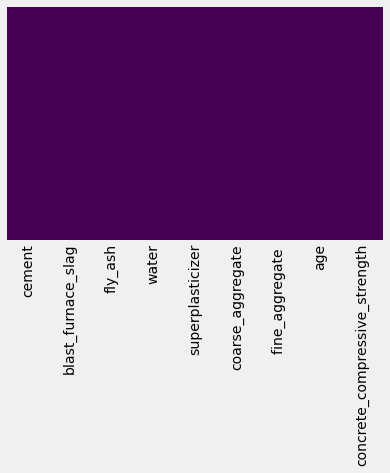

In [158]:
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis');

In [159]:
# checking the 5 number summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
blast_furnace_slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
fly_ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplasticizer,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarse_aggregate,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fine_aggregate,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
concrete_compressive_strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


In [160]:
# Quartiles of cement
from scipy import stats

Q1 = data['cement'].quantile(q=0.25)
Q3 = data['cement'].quantile(q=0.75)
print('Quartile 1 is:', Q1)
print('Quartile 3 is:', Q3)
print('Inter Quartile Range is:', stats.iqr(data['cement']))

Quartile 1 is: 190.7
Quartile 3 is: 349.0
Inter Quartile Range is: 158.3


In [161]:
# outliers detection from IQR in original data
Lwr_outliers = Q1 - 1.5 * (Q3 - Q1)
upr_outliers = Q3 + 1.5 * (Q3 - Q1)
print('Lower limit Outliers in cement: ', Lwr_outliers)
print('Upper limit Outliers in cement: ',upr_outliers)

Lower limit Outliers in cement:  -46.75000000000003
Upper limit Outliers in cement:  586.45


In [162]:
# checking the presence of outliers in cement
print("Number of outliers in cement upper: ", data[data['cement'] > 586.45]['cement'].count())
print("Number of outliers in cement lower: ", data[data['cement'] < -46.75000000000003]['cement'].count())

Number of outliers in cement upper:  0
Number of outliers in cement lower:  0


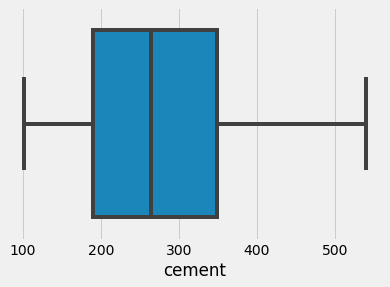

In [163]:
# checking outliers in cement using boxplot
sns.boxplot(data=data, x='cement', orient='h');

- here we see there is no outliers in cement attribute.

In [164]:
# Quartiles of Age
Q1 = data['age'].quantile(q=0.25)
Q3 = data['age'].quantile(q=0.75)
print('Quartile 1 is:', Q1)
print('Quartile 3 is:', Q3)
print('Inter Quartile Range of age:', stats.iqr(data['age']))

Quartile 1 is: 7.0
Quartile 3 is: 56.0
Inter Quartile Range of age: 49.0


In [165]:
# Outliers detection in age
lwr_outliers = Q1 - 1.5 * (Q3 - Q1)
Upr_outliers = Q3 + 1.5 * (Q3 - Q1)
print('Lower limit:', lwr_outliers)
print('Upper limit:', Upr_outliers)

Lower limit: -66.5
Upper limit: 129.5


In [166]:
print('The number of outliers above upper limit:', data[data['age'] > 129.5]['age'].count())
print('The number of outliers below lower limit:', data[data['age'] < -66.5]['age'].count())

The number of outliers above upper limit: 59
The number of outliers below lower limit: 0


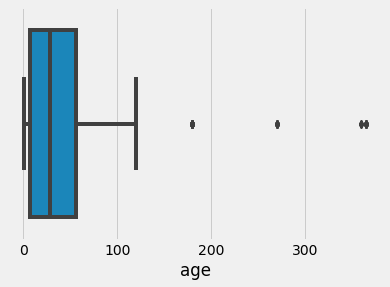

In [167]:
# visualize the boxplot of age 
sns.boxplot(data=data, x='age', orient='h');

*Histplot*

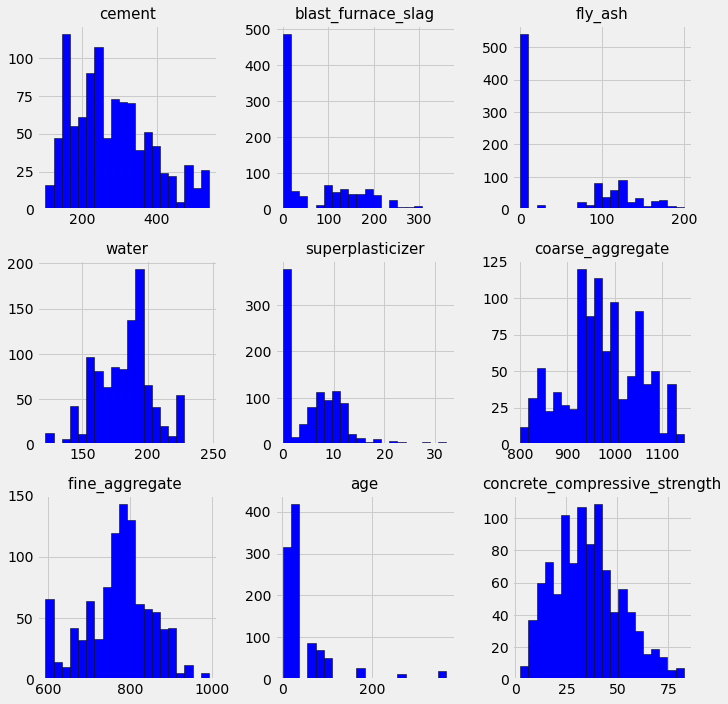

In [168]:
plt.figure(figsize=(10, 10))
col_list = data.columns

for i in range(len(data.columns)):
    plt.subplot(3, 3, i+1)
    plt.hist(data[col_list[i]], edgecolor='k', color='blue', bins=20)
    plt.title(col_list[i], color='k', fontsize=15)
    plt.tight_layout()

*Boxplot*

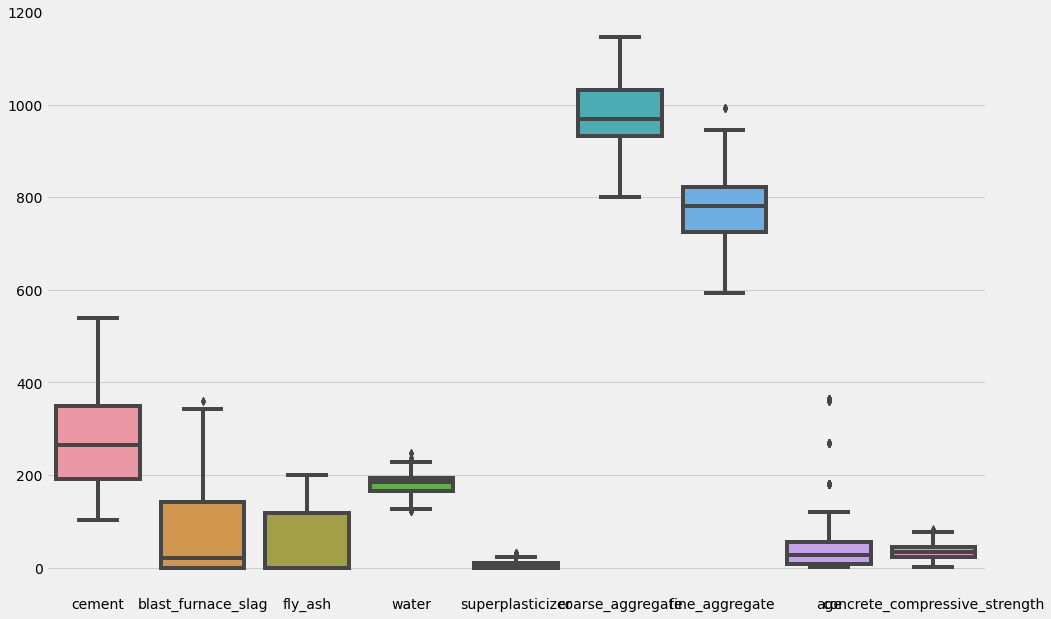

In [169]:
# plot the boxplot is there any outliers in this dataset
plt.figure(figsize=(15,10))
sns.boxplot(data=data, orient='v');

observing the boxplot we see that some outliers in this dataset, so we must deal with that.

In [170]:
# replacing outliers with median value
for cols in data.columns[:-1]:
    Q1 = data[cols].quantile(q=0.25)
    Q3 = data[cols].quantile(q=0.75)
    iqr = Q3 - Q1
    
    below = Q1 - 1.5 * iqr
    above = Q3 + 1.5 * iqr
    data.loc[(data[cols] < below) | (data[cols] > above), cols] = data[cols].median()

<AxesSubplot:>

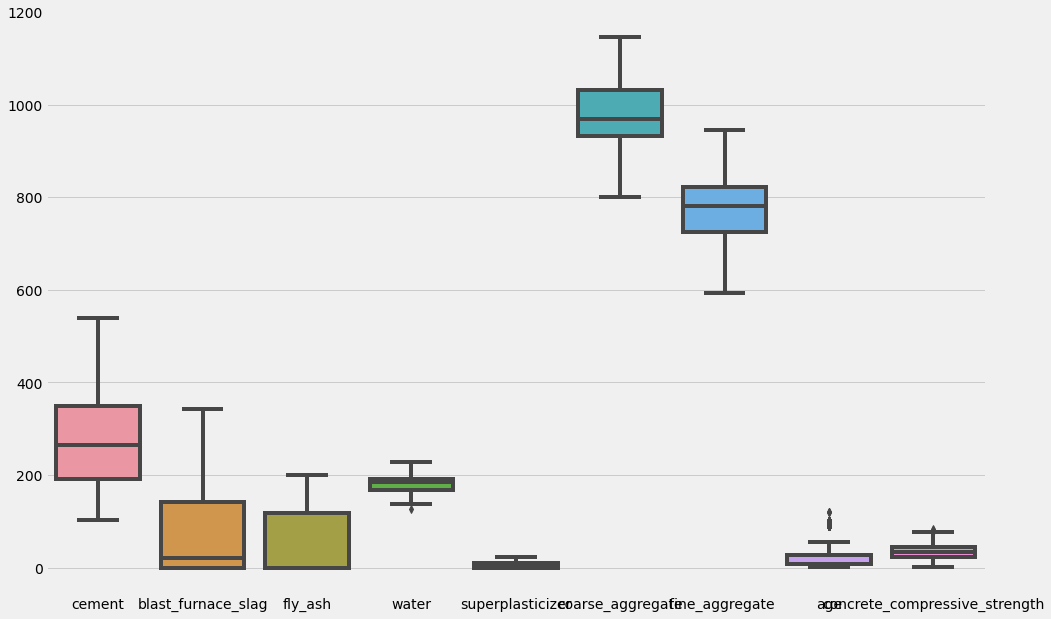

In [171]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, orient='v')

Now most of the outliers are gone.

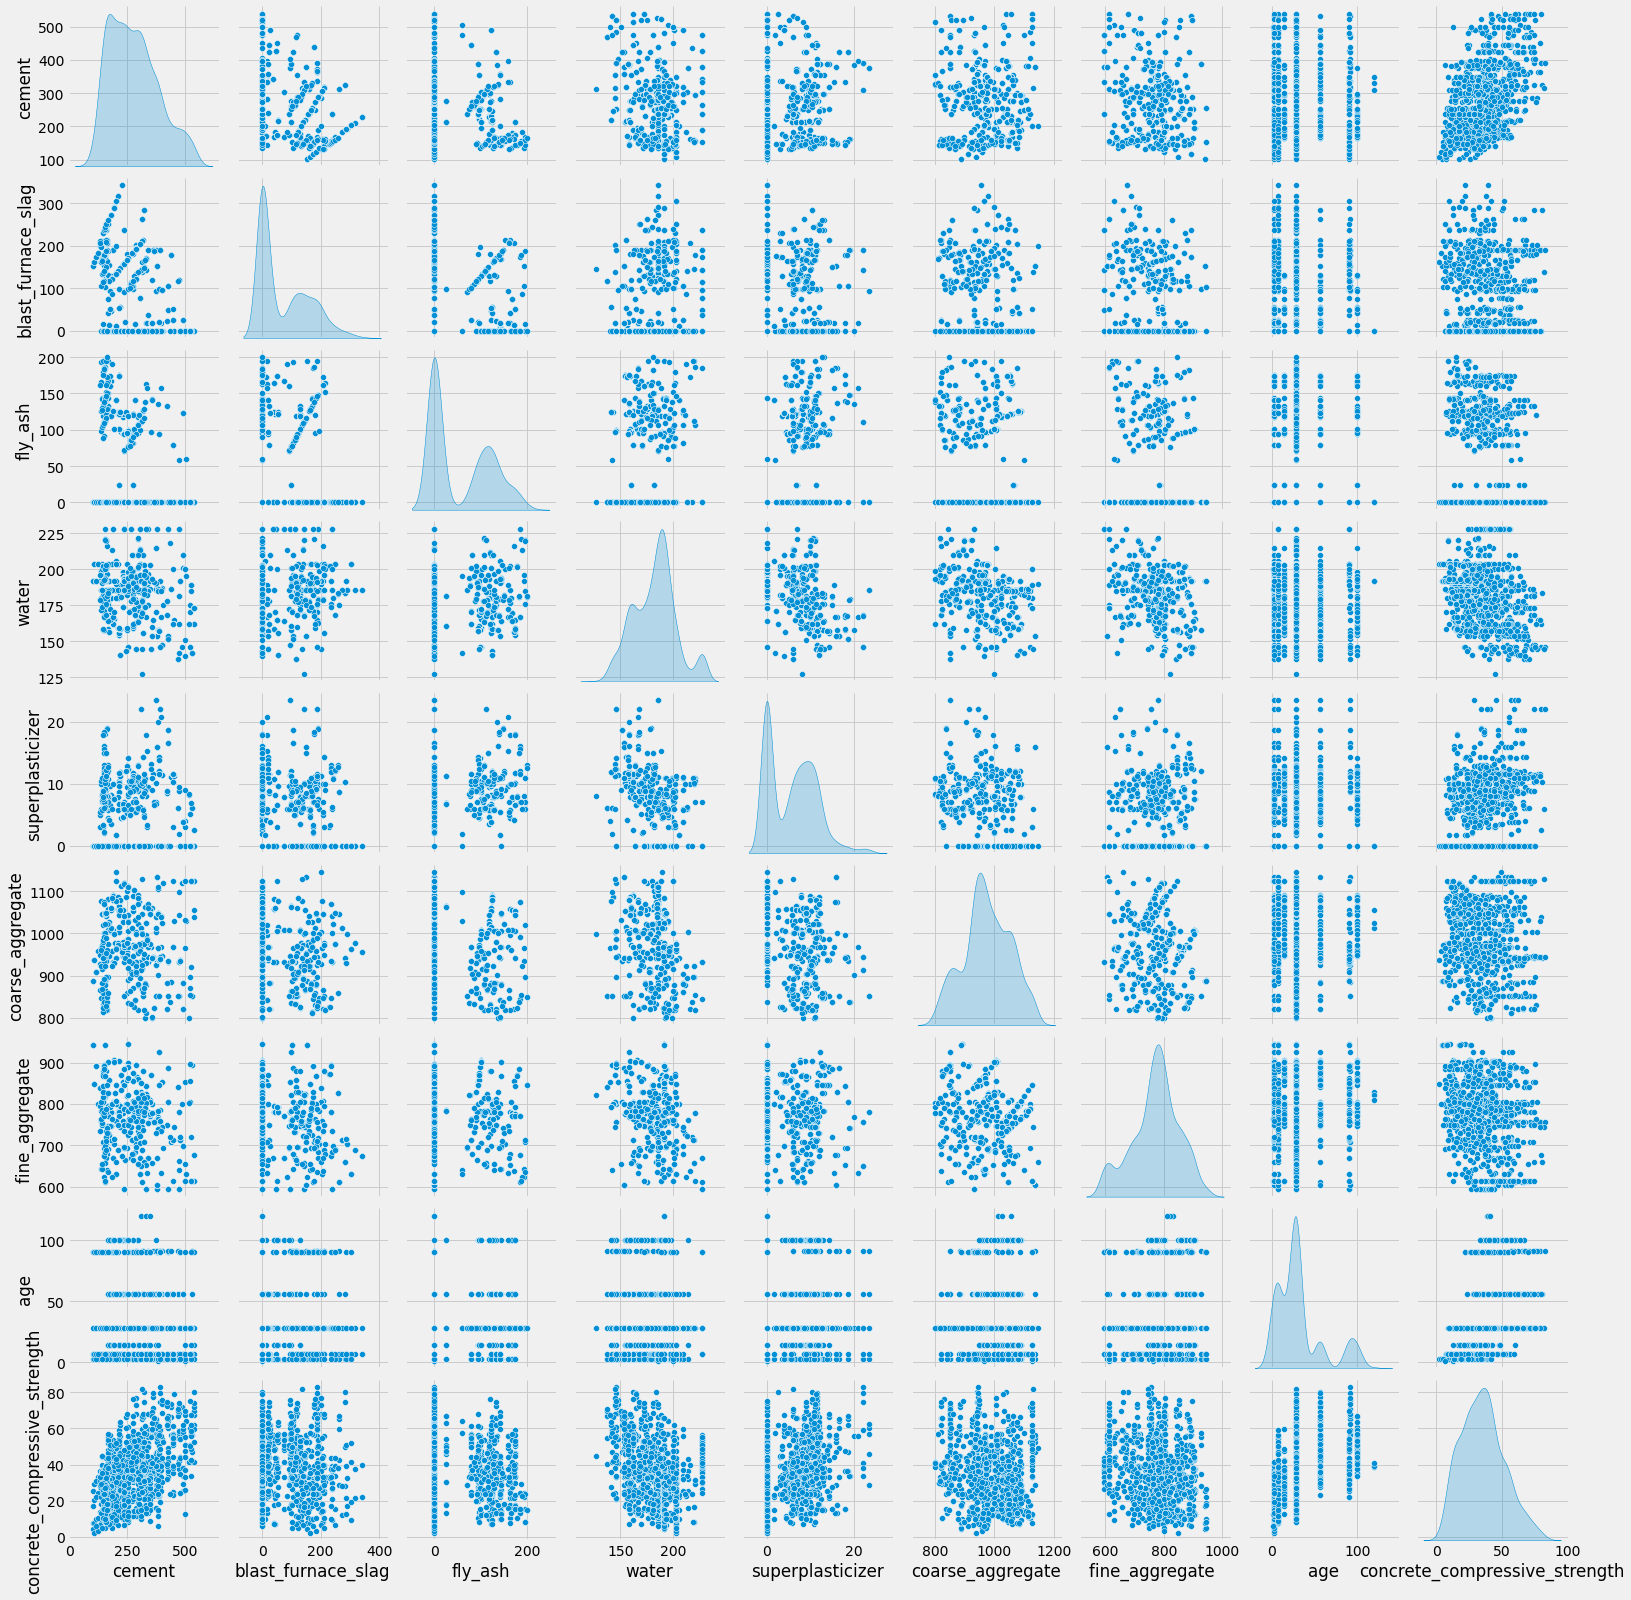

In [172]:
# pairplot
sns.pairplot(data=data, diag_kind='kde');

In [173]:
# checking the correlation 
data.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.303669,-0.385610,-0.053217,-0.026511,-0.086205,-0.262508,-0.038201,0.488283
blast_furnace_slag,-0.303669,1.000000,-0.308903,0.132249,0.034945,-0.277239,-0.291118,-0.035485,0.105877
fly_ash,-0.385610,-0.308903,1.000000,-0.296261,0.492786,-0.026468,0.103619,0.063818,-0.080648
water,-0.053217,0.132249,-0.296261,1.000000,-0.610666,-0.213945,-0.425633,-0.034910,-0.278499
superplasticizer,-0.026511,0.034945,0.492786,-0.610666,1.000000,-0.195028,0.136685,0.057438,0.318721
coarse_aggregate,-0.086205,-0.277239,-0.026468,-0.213945,-0.195028,1.000000,-0.144140,0.022952,-0.144717
fine_aggregate,-0.262508,-0.291118,0.103619,-0.425633,0.136685,-0.144140,1.000000,0.051224,-0.202883
age,-0.038201,-0.035485,0.063818,-0.034910,0.057438,0.022952,0.051224,1.000000,0.498530
concrete_compressive_strength,0.488283,0.105877,-0.080648,-0.278499,0.318721,-0.144717,-0.202883,0.498530,1.000000


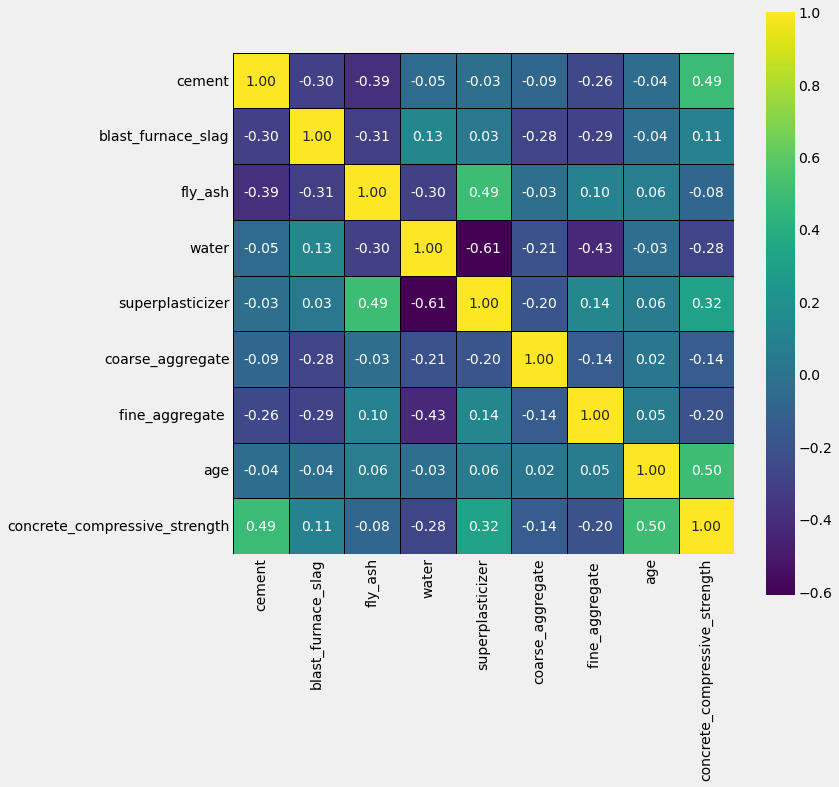

In [174]:
# plotting correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, square=True, cmap='viridis', fmt='.2f', linewidths=0.5, linecolor='k');

In [175]:
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.30


In [176]:
# separate our data into dependent and independent.
X = data.iloc[:, :-1]
y = data.iloc[:,-1]

In [177]:
# Scale the data
from scipy.stats import zscore

Xscaled = X.apply(zscore)
Xscaled_df = pd.DataFrame(Xscaled, columns=data.columns)

In [178]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.2, random_state=42)

### **Building Models**

*1. Random Forest*

In [179]:
from sklearn.ensemble import RandomForestRegressor

Rfr = RandomForestRegressor()
Rfr.fit(X_train, y_train)

RandomForestRegressor()

In [180]:
# make prediction
Rf_pred = Rfr.predict(X_test)

In [181]:
# model performance on training data 
print("Training Score is : {0:.2f}%".format(Rfr.score(X_train, y_train)*100))

Training Score is : 97.98%


In [182]:
# model performance on testing data
print("Testing score is: {0:.2f}%".format(Rfr.score(X_test, y_test)*100))

Testing score is: 89.99%


In [183]:
# Calculating the error
from sklearn import metrics 

print("The Mean Squared Error is: ", metrics.mean_squared_error(y_test, Rf_pred))

The Mean Squared Error is:  29.873508507588554


In [184]:
Rf_accuracy = (metrics.r2_score(y_test, Rf_pred)*100)
print(Rf_accuracy)

89.9862500428661


The error is little bit huge.

In [185]:
# Store each model accuracy to doing final comparison.
result_1 = pd.DataFrame({'Algorithm' : ['Random Forest'], 'Accuracy' : Rf_accuracy}, index={'1'})
table = result_1[['Algorithm', 'Accuracy']]
table

,Algorithm,Accuracy
1,Random Forest,89.98625


In [186]:
# using KFold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

K = 20

kf = KFold(n_splits=K, shuffle=True, random_state=45)
cv = cross_val_score(Rfr, X, y, cv=K)
cv_score = np.mean(abs(cv))*100

In [187]:
cv

array([0.54848099, 0.52189912, 0.07199703, 0.94347872, 0.69145885,
       0.80041589, 0.73100803, 0.7157661 , 0.1780661 , 0.72497428,
       0.75361756, 0.76015901, 0.9139173 , 0.84070002, 0.85591477,
       0.8745901 , 0.91711598, 0.95509944, 0.84819051, 0.95321273])

In [188]:
cv_score

73.00031260767501

In [189]:
Rf_cv = pd.DataFrame({'Algorithm' : ['Random Forest KFold'], 'Accuracy' : cv_score}, index={'2'})
table = pd.concat([table, Rf_cv])
table = table[['Algorithm', 'Accuracy']]
table

,Algorithm,Accuracy
1,Random Forest,89.986250
2,Random Forest KFold,73.000313


*2. Gradient Boost Regressor*

In [190]:
from sklearn.ensemble import GradientBoostingRegressor 

params = {'n_estimators' : 100, 'learning_rate' : 1, 'criterion' : 'mse'}
gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', learning_rate=1)

In [191]:
# prediction
gbr_pred = gbr.predict(X_test)

In [192]:
# Training Accuracy
print('Training Accuracy of GradientBoostingRegressor is: {0:.2f}%'.format(gbr.score(X_train, y_train)*100))

Training Accuracy of GradientBoostingRegressor is: 98.32%


In [193]:
# Testing Accuracy
print('Training Accuracy of GradientBoostingRegressor is: {0:.2f}%'.format(gbr.score(X_test, y_test)*100))

Training Accuracy of GradientBoostingRegressor is: 84.90%


In [194]:
gbr_accuracy = metrics.r2_score(gbr_pred, y_test)*100
gbr_accuracy

84.33170235784769

In [195]:
# Calculating the error
print("The Mean Squared Error is: {}".format(metrics.mean_squared_error(y_test, gbr_pred)))

The Mean Squared Error is: 45.05521012560507


the error higher than random forest regressor.

In [196]:
gb_df = pd.DataFrame({'Algorithm' : ['Gradient Boosting Regressor'], 'Accuracy' : gbr_accuracy}, index={'3'})
table = pd.concat([table, gb_df])
table = table[['Algorithm', 'Accuracy']]
table

,Algorithm,Accuracy
1,Random Forest,89.986250
2,Random Forest KFold,73.000313
3,Gradient Boosting Regressor,84.331702


In [197]:
# using KFold cross validation
gb_K = KFold(n_splits=20, shuffle=True, random_state=1)
gb_cv = cross_val_score(gbr, X, y, cv=gb_K)
gbcv_score = np.mean(abs(gb_cv))*100

In [198]:
gb_cv

array([0.91044791, 0.89911943, 0.9109512 , 0.90666801, 0.85491924,
       0.85836345, 0.9122996 , 0.87780041, 0.86071507, 0.88569012,
       0.94076186, 0.88078999, 0.82451308, 0.8553347 , 0.91760122,
       0.90932093, 0.96772575, 0.94460119, 0.88925731, 0.85798847])

In [199]:
gbcv_score

89.32434473969283

In [200]:
gbK_df = pd.DataFrame({'Algorithm' : ['Gradient BoostingR KFold'], 'Accuracy' : gbcv_score}, index={'4'})
table = pd.concat([table, gbK_df])
table = table[['Algorithm', 'Accuracy']]
table

,Algorithm,Accuracy
1,Random Forest,89.986250
2,Random Forest KFold,73.000313
3,Gradient Boosting Regressor,84.331702
4,Gradient BoostingR KFold,89.324345


### **AdaBoost Regressor**

In [201]:
from sklearn.ensemble import AdaBoostRegressor 

Abr = AdaBoostRegressor(random_state=42)
Abr.fit(X_train, y_train)

AdaBoostRegressor(random_state=42)

In [202]:
# prediction
Abr_pred = Abr.predict(X_test)

In [203]:
# Training Accuracy
print('Training Accuracy of AdaBoostRegressor is: {0:.2f}%'.format(Abr.score(X_train, y_train)*100))

Training Accuracy of AdaBoostRegressor is: 80.83%


In [204]:
print('Testing Accuracy of AdaBoostRegressor is: {0:.2f}%'.format(Abr.score(X_test, y_test)*100))

Testing Accuracy of AdaBoostRegressor is: 77.86%


In [205]:
Abr_accuracy = metrics.r2_score(Abr_pred, y_test)*100
Abr_accuracy

55.57449282646887

In [206]:
# Calculating the error
print("The Mean Squared Error is: {}".format(metrics.mean_squared_error(y_test, Abr_pred)))

The Mean Squared Error is: 66.04491300072635


In [207]:
Abr_df = pd.DataFrame({'Algorithm': ['AdaBoostRegressor'], 'Accuracy': Abr_accuracy}, index={'5'})
table = pd.concat([table, Abr_df])
table = table[['Algorithm', 'Accuracy']]
table

,Algorithm,Accuracy
1,Random Forest,89.986250
2,Random Forest KFold,73.000313
3,Gradient Boosting Regressor,84.331702
4,Gradient BoostingR KFold,89.324345
5,AdaBoostRegressor,55.574493


In [208]:
# hyper parameter tuning in AdaBoostRegressor
adr = AdaBoostRegressor(random_state=42, base_estimator=Rfr,n_estimators=100, learning_rate=0.1)
adr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(), learning_rate=0.1,
                  n_estimators=100, random_state=42)

In [209]:
adr_pred = adr.predict(X_test)

In [210]:
# Training Accuracy
print('Training Accuracy of AdaBoostRegressor Hyper is: {0:.2f}%'.format(adr.score(X_train, y_train)*100))

Training Accuracy of AdaBoostRegressor Hyper is: 98.26%


In [211]:
print('Testing Accuracy of AdaBoostRegressor Hyper is: {0:.2f}%'.format(adr.score(X_test, y_test)*100))

Testing Accuracy of AdaBoostRegressor Hyper is: 90.83%


In [212]:
adr_accuracy = metrics.r2_score(adr_pred, y_test)*100
adr_accuracy

87.91183039450097

In [213]:
# Calculating the error
print("The Mean Squared Error is: {}".format(metrics.mean_squared_error(y_test, adr_pred)))

The Mean Squared Error is: 27.36674903295734


In [214]:
adr_df = pd.DataFrame({'Algorithm': ['AdaBoostRegressor Hyper'], 'Accuracy': adr_accuracy}, index={'6'})
table = pd.concat([table, adr_df])
table = table[['Algorithm', 'Accuracy']]
table

,Algorithm,Accuracy
1,Random Forest,89.986250
2,Random Forest KFold,73.000313
3,Gradient Boosting Regressor,84.331702
4,Gradient BoostingR KFold,89.324345
5,AdaBoostRegressor,55.574493
6,AdaBoostRegressor Hyper,87.911830


### **KNN Regressor**

In [215]:
from sklearn.neighbors import KNeighborsRegressor
# Checking different values for k 
error_rate = []

for i in range(1,50):
    KNN = KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train, y_train)
    knn_pred = KNN.predict(X_test)
    error_rate.append(np.mean(knn_pred != y_test))

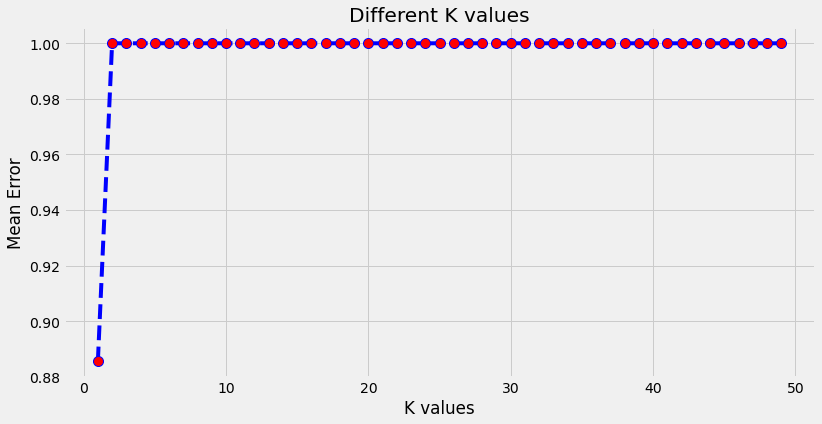

In [216]:
# plot the figure
plt.figure(figsize=(12,6))
plt.plot(range(1,50), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Different K values')
plt.xlabel('K values')
plt.ylabel('Mean Error');

In [217]:
# take k=3
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [218]:
knn_pred = knn.predict(X_test)

In [219]:
print('Training Score of KNeighborsRegressor is {0:.2f}%'.format(knn.score(X_train, y_train)*100))

Training Score of KNeighborsRegressor is 88.30%


In [220]:
print('Testing Score of KNeighborsRegressor is {0:.2f}%'.format(knn.score(X_test, y_test)*100))

Testing Score of KNeighborsRegressor is 76.96%


In [221]:
knn_accuracy = metrics.r2_score(knn_pred, y_test)*100
knn_accuracy

67.57053483189782

In [222]:
# Calculating the error
print("The Mean Squared Error is: {}".format(metrics.mean_squared_error(y_test, knn_pred)))

The Mean Squared Error is: 68.71977512437809


In [223]:
knn_df = pd.DataFrame({'Algorithm': ['KNeighborsRegressor'], 'Accuracy': knn_accuracy}, index={'7'})
table = pd.concat([table, knn_df])
table = table[['Algorithm', 'Accuracy']]
table

,Algorithm,Accuracy
1,Random Forest,89.986250
2,Random Forest KFold,73.000313
3,Gradient Boosting Regressor,84.331702
4,Gradient BoostingR KFold,89.324345
5,AdaBoostRegressor,55.574493
6,AdaBoostRegressor Hyper,87.911830
7,KNeighborsRegressor,67.570535


In [225]:
KNeighborsRegressor().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [226]:
# Hyper Parameter Tuning of KNN
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors' : [3, 5, 7, 9, 11, 13],
              'weights' : ['uniform', 'distance'],
              'metric' : ['minkowski', 'euclidean', 'manhattan']}

In [227]:
gs = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, verbose=1, cv=5, n_jobs=-1)

In [228]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [229]:
# find the best score
gs.best_score_

0.7823196027107583

In [230]:
# get the hyper parameters with best score
gs.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}

In [231]:
# use the best HyperParameters
KNN = KNeighborsRegressor(n_neighbors=5, metric='minkowski', weights='distance')
KNN.fit(X_train, y_train)

KNeighborsRegressor(weights='distance')

In [236]:
ky_pred = KNN.predict(X_test)

In [240]:
print('Training Accuracy is: {0:.2f}%'.format(KNN.score(X_train, y_train)*100))

Training Accuracy is: 99.29%


In [241]:
print('Testing Accuracy is: {0:.2f}%'.format(KNN.score(X_test, y_test)*100))

Testing Accuracy is: 81.89%


In [242]:
Hknn_accuracy = metrics.r2_score(y_test, ky_pred)*100
Hknn_accuracy

81.89354082898956

In [243]:
# Calculating the error
print("The Mean Squared Error is: {}".format(metrics.mean_squared_error(y_test, ky_pred)))

The Mean Squared Error is: 54.01607433807953


In [244]:
HK_df = pd.DataFrame({'Algorithm': ['KNeighborsRegressor Hyper'], 'Accuracy': Hknn_accuracy}, index={'8'})
table = pd.concat([table, HK_df])
table = table[['Algorithm', 'Accuracy']]
table

,Algorithm,Accuracy
1,Random Forest,89.986250
2,Random Forest KFold,73.000313
3,Gradient Boosting Regressor,84.331702
4,Gradient BoostingR KFold,89.324345
5,AdaBoostRegressor,55.574493
6,AdaBoostRegressor Hyper,87.911830
7,KNeighborsRegressor,67.570535
8,KNeighborsRegressor Hyper,81.893541


### **Bagging Regressor**

In [245]:
from sklearn.ensemble import BaggingRegressor 

bg = BaggingRegressor()
bg.fit(X_train, y_train)

BaggingRegressor()

In [246]:
# make prediction
bg_pred = bg.predict(X_test)

In [247]:
print('Training Score is: {0:.2f}%'.format(bg.score(X_train, y_train)*100))
print('Testing Score is: {0:.2f}%'.format(bg.score(X_test, y_test)*100))

Training Score is: 97.47%
Testing Score is: 88.99%


In [249]:
bg_accuracy = metrics.r2_score(bg_pred, y_test)*100
bg_accuracy

85.98183225719336

In [250]:
# calculating error
print("Mean Squared Error is: {}".format(metrics.mean_squared_error(y_test, bg_pred)))

Mean Squared Error is: 32.85203727691034


In [251]:
# hyper parameter tuning of BaggingRegressor
BaggingRegressor().get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
grid_params = {'n_estimators' : [10, 20, 30], 
               'max_features' : list(range(1,6)),
               'max'}